# Title : Analyzing Customer Churn in a Telecommunications Company

In [1]:
import numpy 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 1.Import the "Telecom_Customer_Churn.csv" dataset.
df = pd.read_csv('telecom_customer_churn.csv')
df

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,...,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,...,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,...,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,NaN,NaN
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,...,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,NaN,NaN


In [3]:
# 2. Explore the dataset to understand its structure and content.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [4]:
df.isnull().mean()*100

Customer ID                           0.000000
Gender                                0.000000
Age                                   0.000000
Married                               0.000000
Number of Dependents                  0.000000
City                                  0.000000
Zip Code                              0.000000
Latitude                              0.000000
Longitude                             0.000000
Number of Referrals                   0.000000
Tenure in Months                      0.000000
Offer                                55.047565
Phone Service                         0.000000
Avg Monthly Long Distance Charges     9.683374
Multiple Lines                        9.683374
Internet Service                      0.000000
Internet Type                        21.666903
Avg Monthly GB Download              21.666903
Online Security                      21.666903
Online Backup                        21.666903
Device Protection Plan               21.666903
Premium Tech 

In [5]:
df.corr(numeric_only=True)['Age']

Age                                  1.000000
Number of Dependents                -0.119000
Zip Code                            -0.008183
Latitude                            -0.010305
Longitude                            0.007612
Number of Referrals                 -0.025141
Tenure in Months                     0.009927
Avg Monthly Long Distance Charges   -0.020010
Avg Monthly GB Download             -0.566518
Monthly Charge                       0.134511
Total Charges                        0.059684
Total Refunds                        0.024168
Total Extra Data Charges             0.025036
Total Long Distance Charges          0.003065
Total Revenue                        0.048265
Name: Age, dtype: float64

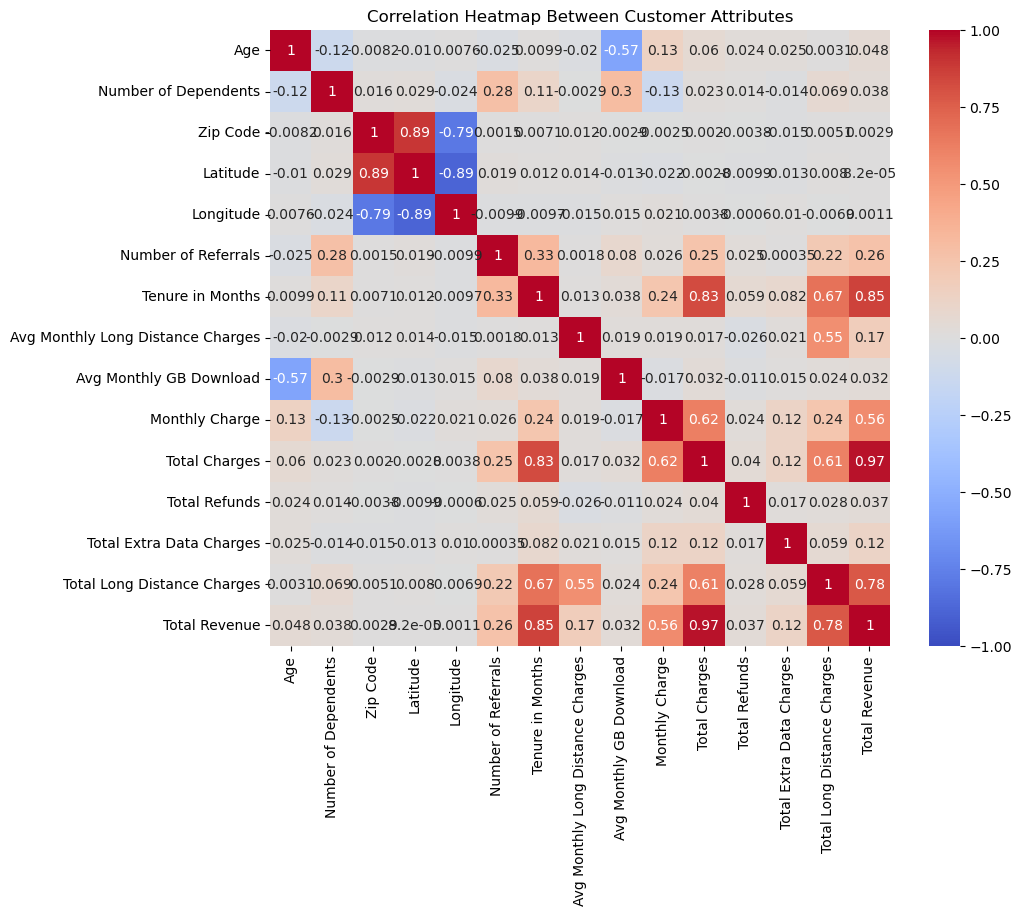

In [6]:
# 4. Correlation Between Weather Attributes

# Select multiple columns correctly using double brackets
cols = [
    'Age', 'Number of Dependents', 'Zip Code', 'Latitude', 'Longitude', 
    'Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges',
    'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds',
    'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue'
]

# Calculate correlation matrix
corr = df[cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap Between Customer Attributes')
plt.show()


In [7]:
df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [8]:
df.describe(include='object')

,Customer ID,Gender,Married,City,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,...,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Customer Status,Churn Category,Churn Reason
count,7043,7043,7043,7043,3166,7043,6361,7043,5517,5517,...,5517,5517,5517,5517,7043,7043,7043,7043,1869,1869
unique,7043,2,2,1106,5,2,2,2,3,2,...,2,2,2,2,3,2,3,3,5,20
top,0002-ORFBO,Male,No,Los Angeles,Offer B,Yes,No,Yes,Fiber Optic,No,...,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,Stayed,Competitor,Competitor had better devices
freq,1,3555,3641,293,824,6361,3390,5517,3035,3498,...,2810,2785,3029,4745,3610,4171,3909,4720,841,313


In [9]:
# 3.Handle missing values in the dataset, deciding on an appropriate strategy
# 4.Remove any duplicate records from the dataset.

In [10]:
df.drop('Offer', axis=1, inplace=True)

In [11]:
df['Churn Category'] = df['Churn Category'].fillna('Not Available',inplace=True)
df['Churn Reason'] = df['Churn Reason'].fillna('Not Available',inplace=True)

In [12]:
# Fill phone-related missing values
df['Avg Monthly Long Distance Charges'].fillna(0, inplace=True)
df['Multiple Lines'].fillna("No Phone Service", inplace=True)

In [13]:
# Fill internet-related missing values
internet_cols = ['Internet Type','Online Security','Online Backup','Device Protection Plan',
                 'Premium Tech Support','Streaming TV','Streaming Movies','Streaming Music','Unlimited Data']

for col in internet_cols:
    df[col].fillna("No Internet Service", inplace=True)

In [14]:
# Fill churn-related missing values
df['Churn Reason'].fillna("No Churn", inplace=True)

In [15]:
# Convert categorical Yes/No to binary
binary_cols = ['Married','Phone Service','Paperless Billing']
for col in binary_cols:
    df[col] = df[col].map({'Yes':1,'No':0})

In [16]:
df.drop('Avg Monthly GB Download', axis=1, inplace=True)
df.drop('Churn Category',axis=1, inplace=True)
df.isnull().sum()

Customer ID                          0
Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
City                                 0
Zip Code                             0
Latitude                             0
Longitude                            0
Number of Referrals                  0
Tenure in Months                     0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing        

In [17]:
df.duplicated().sum()

0

In [18]:
# 5.Check for inconsistent data, such as inconsistent formatting or spelling variations, and standardize it.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   int64  
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Phone Service                      7043 non-null   int64

In [20]:
df.rename(columns={
    'Number of Dependents' : 'No of Dependt',
    'Avg Monthly Long Distance Charges' : 'Avg Monthly LDC'  
},inplace=True)

In [21]:
# 6.Convert columns to the correct data types as needed.
df['Total Revenue'] = df['Total Revenue'].astype('int64')
df['Total Long Distance Charges'] = df['Total Long Distance Charges'].astype('int64')
df['Total Refunds'] = df['Total Refunds'].astype('int64')
df['Total Charges'] = df['Total Charges'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  7043 non-null   object 
 1   Gender                       7043 non-null   object 
 2   Age                          7043 non-null   int64  
 3   Married                      7043 non-null   int64  
 4   No of Dependt                7043 non-null   int64  
 5   City                         7043 non-null   object 
 6   Zip Code                     7043 non-null   int64  
 7   Latitude                     7043 non-null   float64
 8   Longitude                    7043 non-null   float64
 9   Number of Referrals          7043 non-null   int64  
 10  Tenure in Months             7043 non-null   int64  
 11  Phone Service                7043 non-null   int64  
 12  Avg Monthly LDC              7043 non-null   float64
 13  Multiple Lines    

In [22]:
# 7.Identify and handle outliers in the data
df.describe()

,Age,Married,No of Dependt,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly LDC,Paperless Billing,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.483033,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,0.903166,22.958954,0.592219,63.596131,2279.911401,1.925600,6.860713,748.664490,3033.880449
std,16.750352,0.499748,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,0.295752,15.448113,0.491457,31.204743,2266.217521,7.791017,25.104978,846.610981,2865.209529
min,19.000000,0.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,0.000000,0.000000,0.000000,-10.000000,18.000000,0.000000,0.000000,0.000000,21.000000
25%,32.000000,0.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,1.000000,9.210000,0.000000,30.400000,400.000000,0.000000,0.000000,70.000000,605.000000
50%,46.000000,0.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,1.000000,22.890000,1.000000,70.050000,1394.000000,0.000000,0.000000,401.000000,2108.000000
75%,60.000000,1.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,1.000000,36.395000,1.000000,89.750000,3786.500000,0.000000,0.000000,1190.500000,4800.500000
max,80.000000,1.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,1.000000,49.990000,1.000000,118.750000,8684.000000,49.000000,150.000000,3564.000000,11979.000000


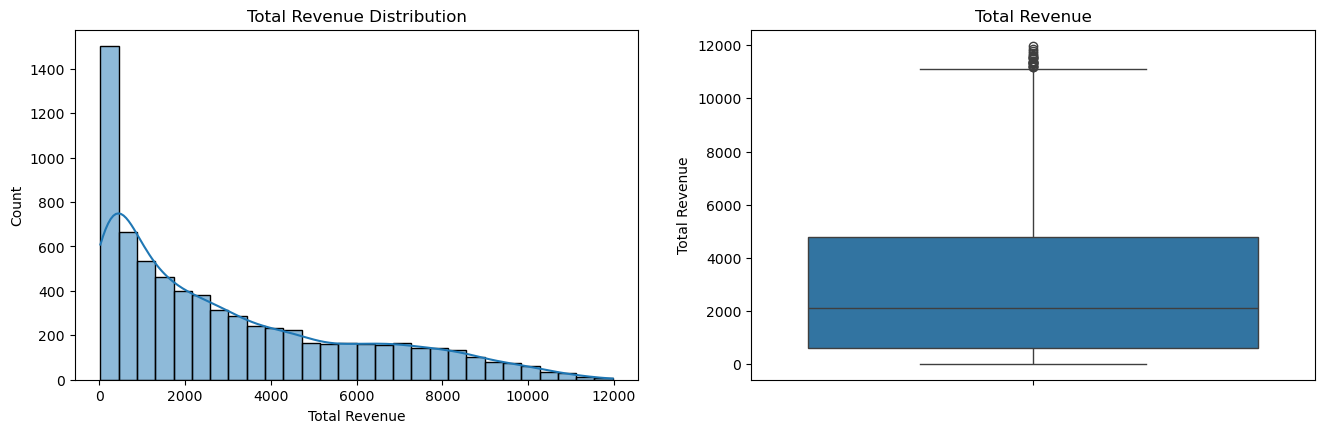

In [23]:
plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
sns.histplot(df['Total Revenue'], kde=True)
plt.title('Total Revenue Distribution')

plt.subplot(2,2,2)
sns.boxplot(df['Total Revenue'])
plt.title('Total Revenue')

plt.show()

In [24]:
df['Total Revenue'].describe()

count     7043.000000
mean      3033.880449
std       2865.209529
min         21.000000
25%        605.000000
50%       2108.000000
75%       4800.500000
max      11979.000000
Name: Total Revenue, dtype: float64

In [25]:
# Finding the IQR 

percent25 = df['Total Revenue'].quantile(0.25)
percent75 = df['Total Revenue'].quantile(0.75)
print('Upper limits',percent25)
print('lower limits',percent75)

Upper limits 605.0
lower limits 4800.5


In [26]:
iqr = percent75 - percent25
iqr

4195.5

In [27]:
upper_limit = percent75 + 1.5 * iqr
lower_limit = percent25 - 1.5 * iqr
print('Upper limit is',upper_limit)
print('Lower limit is',lower_limit)

Upper limit is 11093.75
Lower limit is -5688.25


In [28]:
df[df['Total Revenue'] > upper_limit].head()

,Customer ID,Gender,Age,Married,No of Dependt,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Reason
95,0164-APGRB,Female,56,0,0,Calistoga,94515,38.629618,-122.593216,0,...,1,Bank Withdrawal,114.90,8496,0,0,3482,11979,Stayed,No Churn
365,0536-ACXIP,Female,34,1,0,Lodi,95242,38.128087,-121.407800,9,...,1,Bank Withdrawal,109.55,8165,0,0,3182,11347,Stayed,No Churn
418,0619-OLYUR,Male,32,1,0,Garden Grove,92840,33.787165,-117.931889,1,...,1,Credit Card,111.90,8071,0,0,3443,11514,Stayed,No Churn
619,0907-HQNTS,Female,74,1,0,Pittsburg,94565,38.006047,-121.916834,8,...,1,Credit Card,113.00,7987,0,0,3234,11221,Stayed,No Churn
1639,2380-DAMQP,Female,63,1,0,La Palma,90623,33.850504,-118.039892,10,...,0,Bank Withdrawal,115.15,8349,0,0,2922,11272,Stayed,No Churn


In [29]:
new_df_cap = df.copy()

new_df_cap['Total Revenue'] = np.where(
    new_df_cap['Total Revenue'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['Total Revenue'] < lower_limit,
        lower_limit,
        new_df_cap['Total Revenue']
    )
)

In [30]:
new_df_cap.shape

(7043, 35)

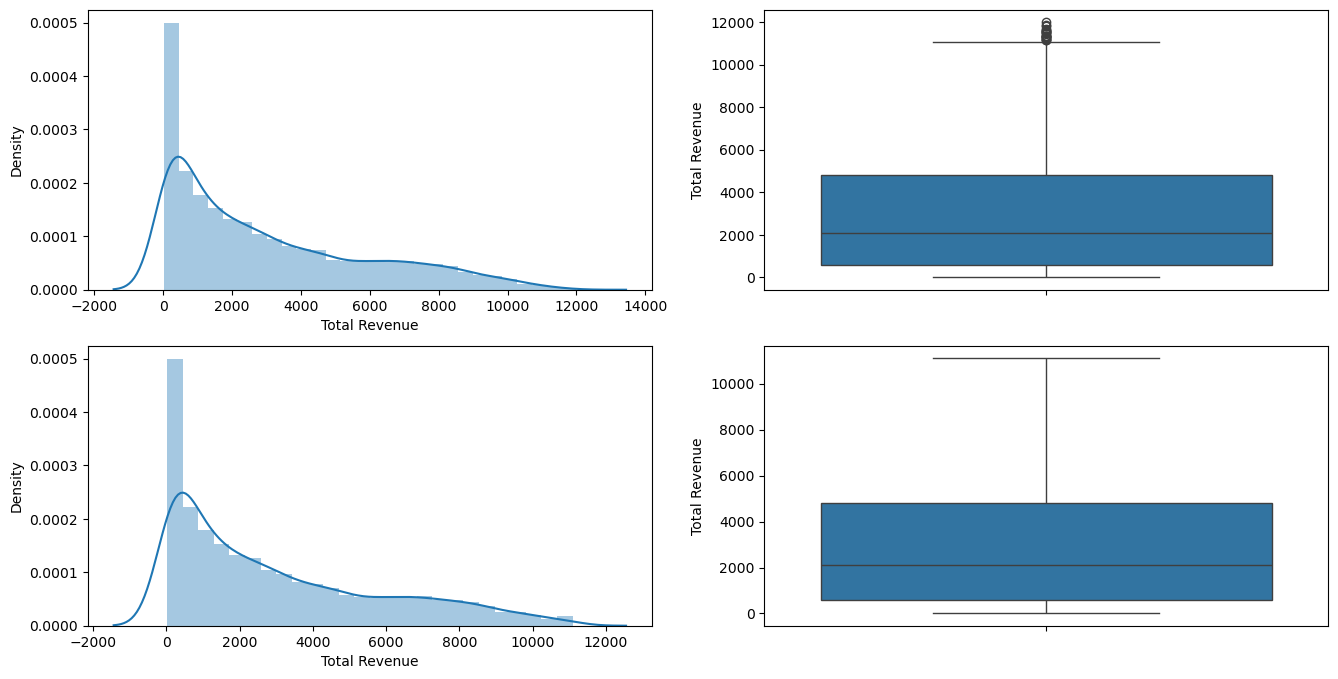

In [31]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.distplot(df['Total Revenue'])

plt.subplot(2,2,2)
sns.boxplot(df['Total Revenue'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['Total Revenue'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['Total Revenue'])

plt.show()

In [32]:
# 8.Perform feature engineering, creating new features that may be relevant to predicting customer churn.
df.describe()

,Age,Married,No of Dependt,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly LDC,Paperless Billing,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.483033,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,0.903166,22.958954,0.592219,63.596131,2279.911401,1.925600,6.860713,748.664490,3033.880449
std,16.750352,0.499748,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,0.295752,15.448113,0.491457,31.204743,2266.217521,7.791017,25.104978,846.610981,2865.209529
min,19.000000,0.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,0.000000,0.000000,0.000000,-10.000000,18.000000,0.000000,0.000000,0.000000,21.000000
25%,32.000000,0.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,1.000000,9.210000,0.000000,30.400000,400.000000,0.000000,0.000000,70.000000,605.000000
50%,46.000000,0.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,1.000000,22.890000,1.000000,70.050000,1394.000000,0.000000,0.000000,401.000000,2108.000000
75%,60.000000,1.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,1.000000,36.395000,1.000000,89.750000,3786.500000,0.000000,0.000000,1190.500000,4800.500000
max,80.000000,1.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,1.000000,49.990000,1.000000,118.750000,8684.000000,49.000000,150.000000,3564.000000,11979.000000


In [33]:
# 8. Perform feature engineering, creating new features that may be relevant to predicting customer churn.
# 9. Normalize or scale the data if necessary.

df['Monthly Charge'].head()

0    65.6
1    -4.0
2    73.9
3    98.0
4    83.9
Name: Monthly Charge, dtype: float64

In [34]:
# 10. Split the dataset into training and testing sets for further analysis.
# 11. Export the cleaned dataset for future analysis or modeling.
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop('Customer Status', axis=1)  # Features
y = df['Customer Status']               # Target variable

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
X_train.shape, X_test.shape

((5634, 34), (1409, 34))

In [36]:
y_train.shape,y_test.shape

((5634,), (1409,))

In [37]:
X.isnull().sum()

Customer ID                    0
Gender                         0
Age                            0
Married                        0
No of Dependt                  0
City                           0
Zip Code                       0
Latitude                       0
Longitude                      0
Number of Referrals            0
Tenure in Months               0
Phone Service                  0
Avg Monthly LDC                0
Multiple Lines                 0
Internet Service               0
Internet Type                  0
Online Security                0
Online Backup                  0
Device Protection Plan         0
Premium Tech Support           0
Streaming TV                   0
Streaming Movies               0
Streaming Music                0
Unlimited Data                 0
Contract                       0
Paperless Billing              0
Payment Method                 0
Monthly Charge                 0
Total Charges                  0
Total Refunds                  0
Total Extr

In [38]:
y.isnull().sum()

0